# Lecture 11 状態空間モデル

岩政追加その２

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import io
#import requests
import statsmodels.api as sm

In [11]:
!ls

DataCard		 fig_PROB_NormalDist_Sim100.png  fig_SVM_HM_MO_02.png
DataCard.tar.gz		 fig_REG_GLM_Poisson1_hist.png	 helpers_05_08.py
Downloads		 fig_SVM_HM_CIR_01.png		 javaproj
__pycache__		 fig_SVM_HM_CIR_02.png		 miniconda3
aaa.png			 fig_SVM_HM_LN_01.png		 mynotebook
decision_tree.svg	 fig_SVM_HM_LN_02.png		 proj
fig_PROB_NormalDist.png  fig_SVM_HM_MO_01.png


In [14]:

# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
df = pd.read_csv("./data/AirPassengers.csv",
                   index_col="Month", 
                   parse_dates=True, 
                   dtype="float")
df.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

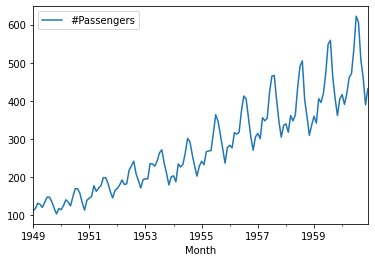

In [15]:
df.plot()

In [29]:
df.columns

Index(['#Passengers'], dtype='object')

In [16]:
# 学習と評価データに分割
df_train = df[df.index < '1957-04-01']
df_test = df[df.index >= '1957-04-01']

/home/iwamasa/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Optimization terminated successfully.
         Current function value: 4.537912
         Iterations: 8
         Function evaluations: 21
         Gradient evaluations: 21


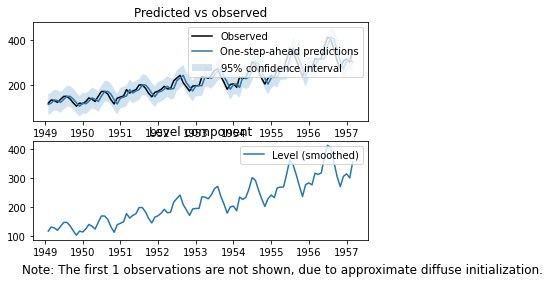

In [17]:


# local level model
local_level_model = sm.tsa.UnobservedComponents(df_train, 'llevel')
# parameter estimation with maximum likelihood estimation
local_level_params = local_level_model.fit(
                        method='bfgs', 
                        maxiter=500)
# plot summary
fig = local_level_params.plot_components()

/home/iwamasa/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Optimization terminated successfully.
         Current function value: 3.400938
         Iterations: 68
         Function evaluations: 111
         Gradient evaluations: 111


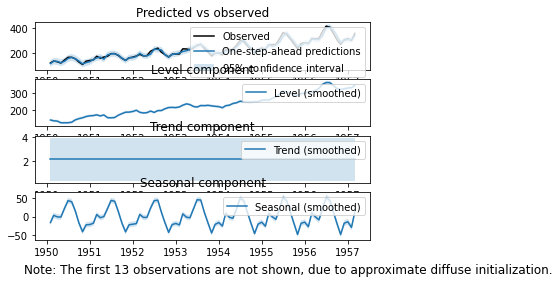

In [19]:
# local level model with seasonality
seasonal_model = sm.tsa.UnobservedComponents(df_train, 'lltrend', seasonal=12)
# parameter estimation with maximum likelihood estimation
seasonal_params = seasonal_model.fit(
                        method='bfgs', 
                        maxiter=500)
# plot summary
fig = seasonal_params.plot_components()

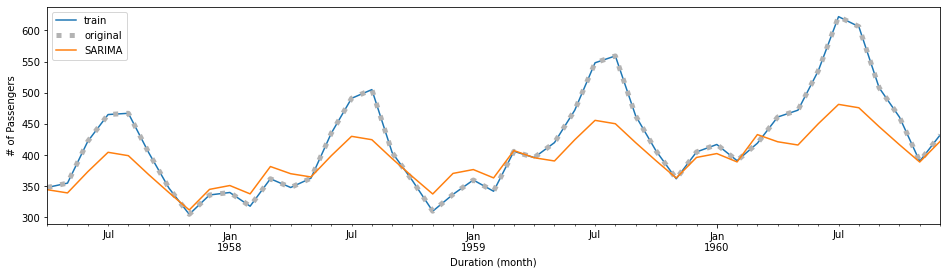

In [24]:
st = pd.to_datetime(df_test.index[0])
ed = pd.to_datetime(df_test.index[-1])
# forecast future values
statespace_pred = seasonal_params.predict(st, ed)
# plot results
ax1 = df_test.plot(figsize=(16,4))
df_test.plot(color="0.7",
          linestyle='dotted',
          linewidth="5.0",
          ax=ax1)
#sarima_pred.plot(ax=ax1)
statespace_pred.plot(ax=ax1)
plt.legend(['train', 'original', 'SARIMA', 'State Space'])
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.show()